# Setup

Since [Pandas](https://pandas.pydata.org/) is almost a one stop shop for everything data analysis in python anyway, most plotting is done using `df.plot()` syntax, however, you must import [Matplotlib](https://matplotlib.org/index.html) since this is a dependency. I would also recommend installing [Seaborn](https://seaborn.pydata.org/) for more interesting plot types and statistical features. Plus it has a nice native style.

## Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

## Display

Couple options for visualizing in a Jupyter Notebook. Either present static charts `inline`, embed them as interactive elements using `notebook` setting, or open the chart in a new windows using a specified backend (e.g. `GTK3Agg` for raster graphics, `GTK3Cairo` for vector graphics). [ipython source](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) (somewhat out of date), [matplotlib source](https://matplotlib.org/faq/usage_faq.html#what-is-a-backend) BTW, [here](https://matplotlib.org/faq/howto_faq.html#howto-webapp) is info on how to run matplotlib in backend of webserver. 

In [2]:
%matplotlib inline
#matplotlib notebook
#%matplotlib GTK3Cairo

## Style

Call `plt.style.available` to show options, then set the style of choice.

And customize the style sheet manually using `rcParams`

See more on styling here: https://matplotlib.org/users/customizing.html

In [3]:
plt.style.use('seaborn-white')

In [4]:
mpl.rc('figure')
mpl.rc('savefig', transparent=True, dpi=700, bbox='tight', pad_inches=.05, format='svg')

For colors, there are endless presets in matplotlib or seaborn. But, you can always construct your own custom length arrays of hues. Below is a sample from [colorbrewer](http://colorbrewer2.org)

In [5]:
colors = [
    '#8dd3c7',
    '#ffffb3',
    '#bebada',
    '#fb8072',
    '#80b1d3'
]

# Data

In [6]:
df = pd.DataFrame(data=np.random.rand(36,4),
                  index=pd.date_range(end=pd.datetime.now(), periods=36, freq='MS'),
                  columns=['A', 'B', 'C', 'D'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2014-11-01 16:20:30.506581 to 2017-10-01 16:20:30.506581
Freq: MS
Data columns (total 4 columns):
A    36 non-null float64
B    36 non-null float64
C    36 non-null float64
D    36 non-null float64
dtypes: float64(4)
memory usage: 1.4 KB


In [8]:
df.describe()

,A,B,C,D
count,36.000000,36.000000,36.000000,36.000000
mean,0.422596,0.547550,0.468966,0.479681
std,0.247752,0.321313,0.265106,0.267501
min,0.026457,0.001291,0.003255,0.041210
25%,0.214541,0.237330,0.287866,0.268569
50%,0.404530,0.656140,0.476305,0.437126
75%,0.627829,0.768578,0.678114,0.709833
max,0.968902,0.987860,0.942951,0.943865


In [9]:
df.head()

,A,B,C,D
2014-11-01 16:20:30.506581,0.309746,0.043582,0.306194,0.451733
2014-12-01 16:20:30.506581,0.147302,0.065193,0.481660,0.768436
2015-01-01 16:20:30.506581,0.443942,0.987860,0.313892,0.673181
2015-02-01 16:20:30.506581,0.123462,0.243108,0.377291,0.749919
2015-03-01 16:20:30.506581,0.517335,0.986954,0.761450,0.201659


## Transform

Group data over time periods. Refer to [Pandas Offset Aliases](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)  

In [10]:
dfA = df.groupby(pd.TimeGrouper('1A')).sum()

In [11]:
dfA.shape

(4, 4)

In [12]:
dfM = df.groupby(pd.TimeGrouper('6M')).sum()

In [13]:
dfM.shape

(7, 4)

# Visualizations

## Plot Categorical Data Over Time

C:\Miniconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


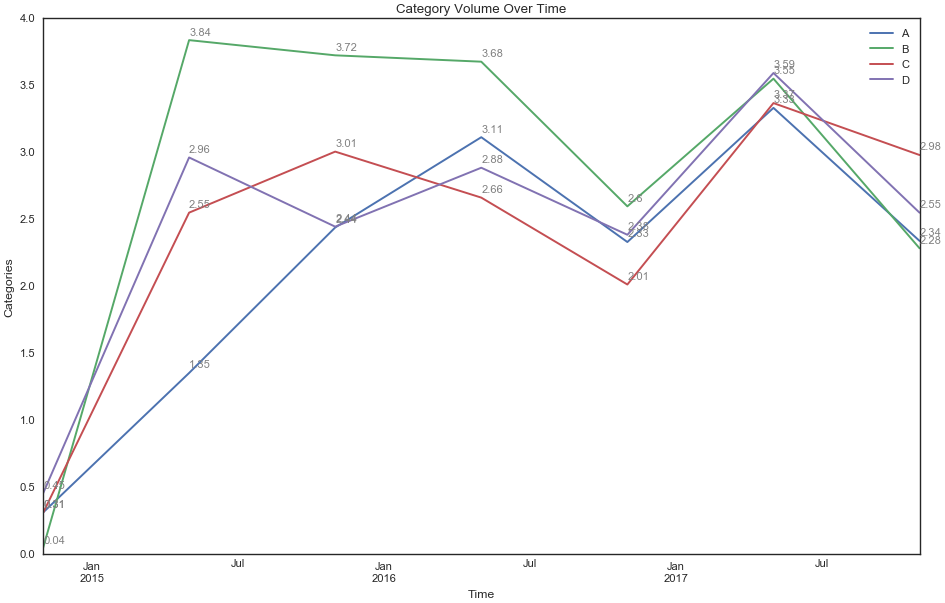

In [14]:
fig, ax = plt.subplots(figsize=(12,8))

dfM.plot(ax=ax)

ax.set(ylabel='Categories', xlabel='Time', title='Category Volume Over Time')

for series in dfM.columns:
    for x,y in zip(dfM.index, dfM[series]):
        ax.annotate(str(round(y,2)),
                    xy=(x,y+(.01*dfM.values.max())),
                    fontsize=10, color='grey')

fig.tight_layout(pad=2)
fig.show()

fig.savefig('category_volume_over_time')

## Plot Categorical Data Over Time Groups

C:\Miniconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


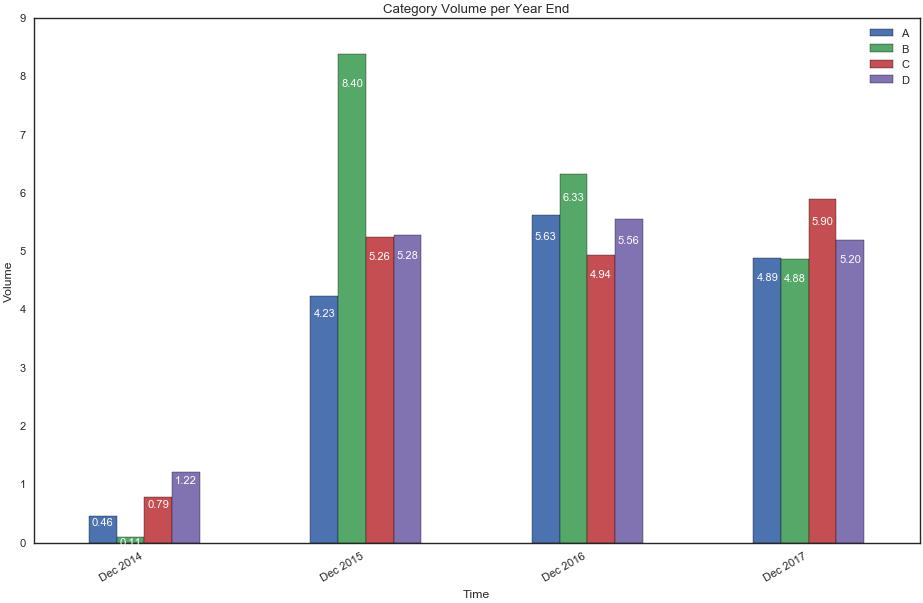

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

dfA.plot(kind='bar', ax=ax)

ax.set(ylabel='Volume', xlabel='Time', title='Category Volume per Year End')

# auto format xaxis labels as date
fig.autofmt_xdate()

# custom format xaxis date labels
# current bug in pandas doesn't allow the following (https://github.com/pandas-dev/pandas/issues/1918)
#ax.xaxis_date()
#ax.xaxis.set_major_locator(mpl.dates.YearLocator())
#ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d %b %Y'))
# so instead we manually set xaxis labels to our custom formatted df index as series of strings
ax.xaxis.set_major_formatter(plt.FixedFormatter(dfA.index.to_series().dt.strftime('%b %Y')))

# annotate data labels onto vertical bars
# see https://matplotlib.org/users/annotations_guide.html
for bar,(col,ix) in zip(ax.patches, pd.MultiIndex.from_product([dfA.columns,dfA.index])):
    label = '{:,.2f}'.format(dfA.loc[ix,col])
    ax.text(s=label, x=bar.get_x()+(bar.get_width()/2), y=bar.get_height()-(.05*bar.get_height()), ha='center', va='top', fontdict={'fontsize':10, 'color':'white'})

fig.tight_layout(pad=2)
fig.show()

fig.savefig('category_volume_per_year_end')

## Building A Fully Customizable Plot From Scratch

C:\Miniconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


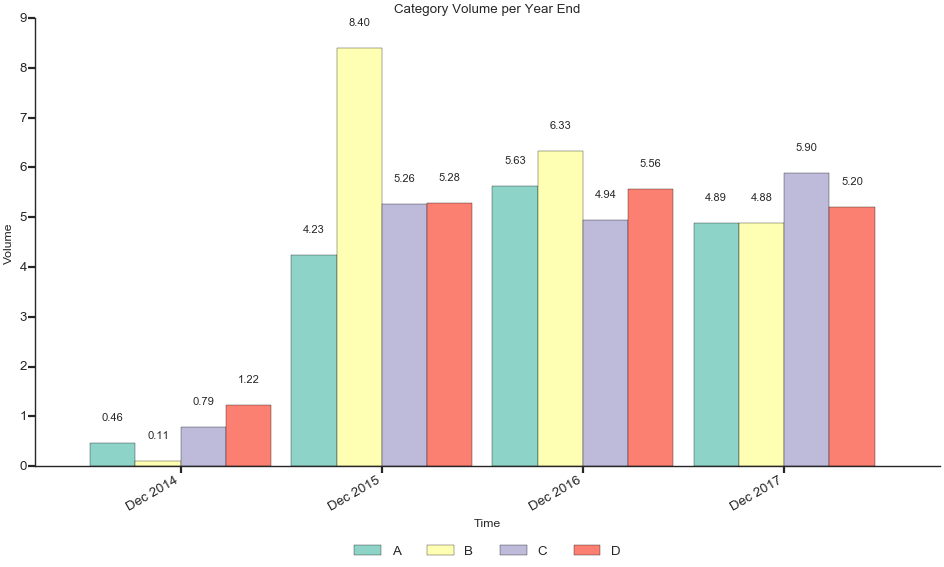

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

series = len(dfA.columns)
groups = len(dfA.index)
bars = series * groups
width = .90 / series
bar_offset = series * width / 2

# bars
for i,(col,values) in enumerate(dfA.iteritems()):
    s = dfA.columns.get_loc(col) + 1
    rect = ax.bar(np.arange(groups)+(s*width)-bar_offset, list(values), width=width, color=colors[i])

ax.set_xticks(np.arange(groups)+width)
ax.set_xticklabels(dfA.index.strftime('%b %Y'))
# auto format xaxis labels as date
fig.autofmt_xdate()

ax.tick_params(axis='both', which='both', direction='out', length=6, width=2,
               left='on', right='off', top='off', bottom='on',
               labelsize=12)

ax.set(ylabel='Volume', xlabel='Time', title='Category Volume per Year End')

# labels
for bar,(col,ix) in zip(ax.patches, pd.MultiIndex.from_product([dfA.columns,dfA.index])):
    label = '{:,.2f}'.format(dfA.loc[ix,col])
    ax.text(s=label, x=bar.get_x()+(bar.get_width()/2), y=bar.get_height()+(.05*dfA.values.max()), ha='center', va='bottom', fontdict={'fontsize':10})

# legend
handles, labels = ax.containers, list(dfA.columns)
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12, frameon=False)
#lgd = ax.legend(handles, labels, loc='lower center', bbox_to_anchor=(0,1.02,1,0.2), ncol=4, fontsize=12, frameon=False)

# remove right and left figure border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = plt.gcf()
fig.tight_layout()
fig.subplots_adjust(top=.9, bottom=.2)
fig.show()

fig.savefig('category_volume_per_year_end_custom')

plt.show()

## Scatterplots

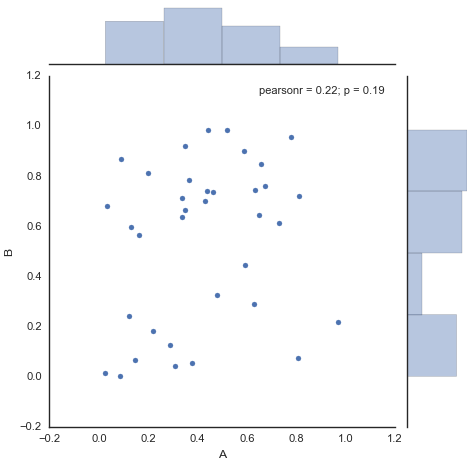

In [17]:
plot = sns.jointplot(df.A, df.B, kind='scatter')
plot.savefig('scatterplot')

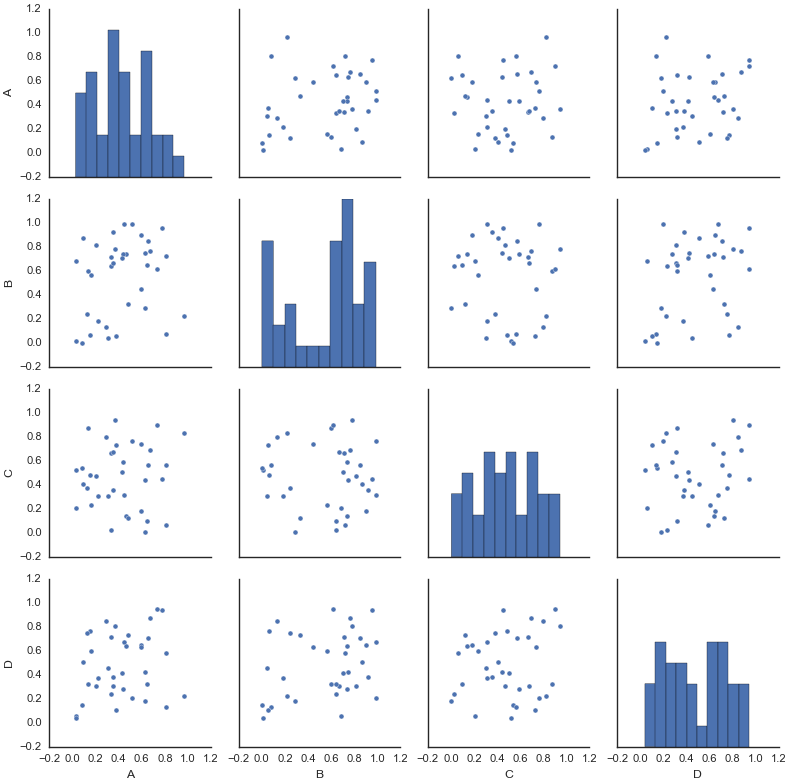

In [18]:
plot = sns.pairplot(df)
plot.savefig('scatterplot_matrix')

# Resources

- [Matplotlib docs](https://matplotlib.org/contents.html)  
- [Pandas Visualization docs](https://pandas.pydata.org/pandas-docs/stable/visualization.html)  
- [Seaborn docs](https://seaborn.pydata.org/api.html) and [Seaborn Tutorials](https://seaborn.pydata.org/tutorial.html#tutorial)  

Chris Moffitt at Practical Business Python has a [great tutorial and helpful infographic](http://pbpython.com/effective-matplotlib.html) on matplotlib  
